## Imports

In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [129]:
df = pd.read_csv('combined_df.csv')

In [134]:
df_relevant = df[['Type', 'Genres', 'Category', 'Content Rating', 'Normal_Rating_Count', 'Normal_Rating','Normal_Reviews', 'Normal_Size', 'Normal_Installs', 'Normal_Price', 'Normal_Revenue', 'Normal_popularity']]

## Label Encoding for ordinal categorical data

In [135]:
# label_encoder = LabelEncoder()
# df_relevant['Content Rating'] = label_encoder.fit_transform(df_relevant['Content Rating'])
# df_relevant['Genres'] = label_encoder.fit_transform(df_relevant['Genres'])
# df_relevant['Category'] = label_encoder.fit_transform(df_relevant['Category'])
label_encoder = LabelEncoder()
df_relevant['Content Rating'] = label_encoder.fit_transform(df_relevant['Content Rating'])
df_relevant['Genres'] = label_encoder.fit_transform(df_relevant['Genres'])
df_relevant['Category'] = label_encoder.fit_transform(df_relevant['Category'])

C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\2857675551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Content Rating'] = label_encoder.fit_transform(df_relevant['Content Rating'])
C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\2857675551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Genres'] = label_encoder.fit_transform(df_relevant['Genres'])
C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\2857675551.py:8: SettingWithCopyWarning: 
A value is trying to be set 

## One-Hot Encoding for nominal categorical data

In [101]:
# # Example using pandas get_dummies for nominal data
# df_relevant = pd.get_dummies(df_relevant, columns=['Genres', 'Category'], drop_first=False)
# for col in df_relevant.columns:
#     if 'Genres' in col or 'Category' in col:
#         df_relevant[col] = df_relevant[col].astype(int)

KeyError: "None of [Index(['Genres', 'Category'], dtype='object')] are in the [columns]"

## Feature selection

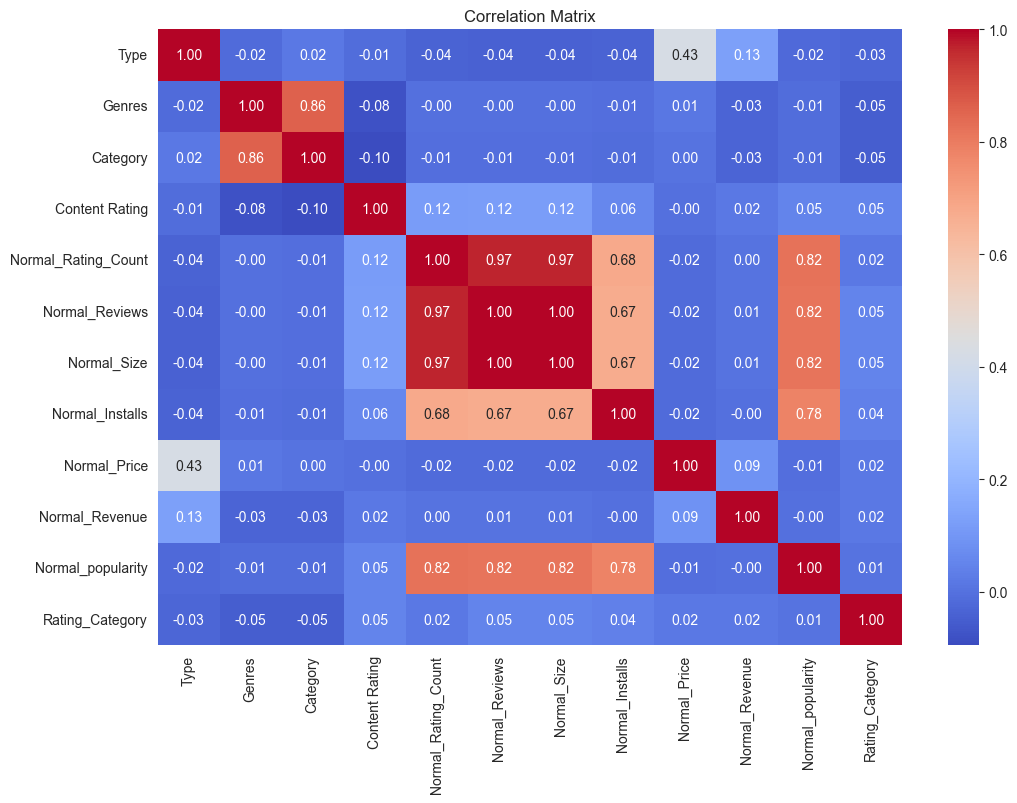

KeyError: 'Normal_Rating'

In [140]:
# Compute the correlation matrix
correlation_matrix = df_relevant.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Select features that have a high correlation with Normal_Rating
correlation_threshold = 0.1  # You can adjust this threshold
relevant_features = correlation_matrix.index[abs(correlation_matrix['Normal_Rating']) > correlation_threshold].tolist()

print("Relevant features based on correlation:", relevant_features)

so based on the result of the correlation, it appears that rating has low correlation with all other features, so it doesn't have strong linear relationship with others, so we should classify it using methods like decision tree or random forest (not linear regression).

## Convert normal_rating to ordinal categorical type to be able to use decision tree and random forest

In [136]:
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = [1, 2, 3, 4, 5]

df_relevant['Rating_Category'] = pd.cut(df_relevant['Normal_Rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
print(df_relevant['Rating_Category'].value_counts())

Rating_Category
5    4480
4    1143
3     518
2      64
1      45
Name: count, dtype: int64


C:\Users\ewint\AppData\Local\Temp\ipykernel_21832\105818674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Rating_Category'] = pd.cut(df_relevant['Normal_Rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)


## Split data

In [137]:
df_relevant = df_relevant.drop(columns=['Normal_Rating'])
features = df_relevant.drop(columns=['Rating_Category'])
targets = df_relevant['Rating_Category']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

## Training the model

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
# Train the model
dt_model.fit(X_train, y_train)
# Make predictions
y_pred = dt_model.predict(X_test)

## Evaluate the model

In [139]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7952
Precision: 0.7900274923364684
Recall: 0.7952
F1 Score: 0.792234614921959
